In [1]:
!ls

image_predictions  twitter-archive-enhanced-2.csv
tweet-json	   wrangle_act2.ipynb


### Importing needed libraries for project 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import requests
import re
import os
#import tweepy
#from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Gathering Data From multi_Source


- download data file "twitter-archive-enhanced-2.csv" manual then import the file in the work space.
- download data file "image-predictions-3.tsv" programmticly then import the file in the work space.
- extract tweet data from twitter API in "tweet-json" file. 

### Frist import 'twitter-archive-enhanced-2.csv' in Dataframe 

In [3]:
df_arc_twitter = pd.read_csv('twitter-archive-enhanced-2.csv')
df_arc_twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### Second download 'image-predictions.tsv' from URL link and import file in Dataframe

In [4]:
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [5]:
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [6]:
df_image_prediction = pd.read_csv('image_predictions/image-predictions.tsv', sep='\t')
df_image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### Third extract tweet data from twitter API in "tweet-json" file and extract some data from "tweet-json" and import it in Dataframe

In [ ]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df_arc_twitter.tweet_id.values
len(tweet_ids)

count = 0
fails_dict = {}
start = timer()
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

### read tweet json data

In [7]:
tw_j = open('tweet-json','r')
data = tw_j.readlines()
tw_j.close() 
len(data)

2354

### Creating dataframe from the tweet-json data

In [8]:
df_list = []
for jd in data:
    jd1 = json.loads(jd)
    
    favorite_count = jd1['favorite_count']
    retweet_count = jd1['retweet_count']
    tweet_id = jd1['id']
    
    df_list.append({'tweet_id':tweet_id, 'retweet_count':retweet_count, 'favorite_count':favorite_count})
    
df_tweet_json = pd.DataFrame(df_list, columns=['tweet_id','retweet_count','favorite_count'])
df_tweet_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


# Assessing The Data 

- In this step we try to find and define the issues in our data the quality and tidiness problem then document this issues

In [9]:
df_arc_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
df_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


## Quality Issues


### df_arc_twitter
- Data type of 'timestamp' column is object type.
- Data type of 'tweer_id' column is integers type.
- There are retweets and replies in data set.
- Null values are represented as "None" string in some columns ('name','doggo','pupper','puppo','floofer').
- Some value in 'name' column are errores like 'a' or 'an'.
- Some value in 'expanded_url' column is missing.
- Some value in 'rating_numerator' and 'rating_denominator' are incorrect and weird.

### df_image_prediction
- Non descriptiv columns name.
- Inconsistent capitalization for predicted breeds ('p1','p2','p3')



## Tidiness Issues

### df_arc_twitter
- Values are columns ('doggo','puppo','pupper','floofer') instead of 'dogs_stage'

### df_tweet_json
- This isn't considered as an observational unit to have its own table need to be merge to arc_twitter


# Clean The Data

- Making copy from orignal dataframe to make my work on it 

In [12]:
image = df_image_prediction.copy()
arc = df_arc_twitter.copy()
tweetj = df_tweet_json.copy()

### Define
- Drops retweets and replies in data set.

### Code

In [13]:
sum(arc["in_reply_to_user_id"].notnull())

78

In [14]:
arc = arc.drop(arc[arc['in_reply_to_user_id'].notna()].index)

In [15]:
arc = arc.drop(arc[arc['retweeted_status_id'].notna()].index)

### Test

In [ ]:
arc.info()

### Define
- Drops rows with missing expanded_urls becuase this mean they haven't any image

### Code

In [16]:
arc = arc.drop(arc[arc['expanded_urls'].isna()].index)

### Test

In [ ]:
arc.info()

### Define
- Drops unnecessary columns after using them for cleaning data set 

### Code

In [17]:
arc = arc.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

### Test

In [ ]:
arc.info()

### Define
- Change data type of 'timestamp' column to datetime type.

### Code

In [18]:
arc['timestamp']= pd.to_datetime(arc['timestamp'])

### Test

In [160]:
arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 1970
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1970 non-null   object             
 1   timestamp           1970 non-null   datetime64[ns, UTC]
 2   source              1970 non-null   object             
 3   text                1970 non-null   object             
 4   expanded_urls       1970 non-null   object             
 5   rating_numerator    1968 non-null   float64            
 6   rating_denominator  1970 non-null   int64              
 7   name                1627 non-null   object             
 8   dog_stage           303 non-null    object             
 9   retweet_count       1970 non-null   int64              
 10  favorite_count      1970 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(6)
memory usage: 264.7+ KB


### Define
- Correct value in 'name' column that isn't name like 'a' or 'an'.
- Cleaning name column and replace "None" string value with nan

### Code

- Check names

In [22]:
this_names = []
for i in range(len(arc)):
    if "this is" in str(arc["text"].iloc[i]).lower():
        print(arc["name"].iloc[i])
        this_names.append(arc["name"].iloc[i])

Phineas
Tilly
Archie
Darla
Franklin
Zoey
Cassie
Koda
Bruno
Ted
Stuart
Oliver
Jim
Zeke
Ralphus
Gerald
Jeffrey
such
Canela
Maya
Mingus
Derek
Roscoe
Waffles
Jimbo
Maisey
Earl
Lola
Kevin
Noah
Bella
Rusty
Gus
Stanley
Alfy
Koko
Rey
Gary
Louis
Bella
Romeo
Bailey
Duddles
Jack
Steven
Beau
Snoopy
Emmy
Aja
Penny
Nelly
Ginger
Benedict
Goose
Jed
Sebastian
Sierra
Monkey
Harry
Kody
Rover
Napolean
Boomer
Cody
Zoey
Rumble
Dewey
Scout
Gizmo
Walter
Shikha
Lili
Jamesy
Coco
Sammy
Nelly
Meatball
Paisley
Albus
Neptune
Belle
Zooey
Dave
Jersey
Hobbes
Burt
Carl
Jordy
quite
Sophie
Wyatt
Rosie
Oscar
Zeke
Callie
Cermet
None
quite
Marlee
Arya
Einstein
Rumpole
Aspen
Jarod
Wiggles
Sailor
Iggy
Kyle
Leo
Riley
Noosh
Kevin
Jerry
Georgie
Rontu
Cannon
Furzey
Tuck
Barney
Vixen
None
Pickles
Brady
Luna
Charlie
Margo
Hank
Tycho
Charlie
Winnie
Bentley
Penny
Max
Dawn
Monty
Odie
Arlo
Walter
Stanley
Daisy
Waffles
Vincent
Lucy
Clark
Mookie
Meera
Ava
Lucy
Eli
Tucker
Tobi
Wilson
Sunshine
Lipton
Bentley
Bronte
Poppy
Gidget
Rhino
Willo

- gather all rubbish names 

In [23]:
trash = ["None"]
for n in set(this_names):
    if n[0].islower():
        trash.append(n)
trash

['None',
 'all',
 'just',
 'an',
 'light',
 'unacceptable',
 'infuriating',
 'incredibly',
 'the',
 'his',
 'my',
 'one',
 'getting',
 'very',
 'not',
 'life',
 'actually',
 'a',
 'officially',
 'space',
 'quite',
 'such',
 'old',
 'by']

- getting indicies of the rubbish names in the dataframe name column

In [61]:
arc.loc[arc['name'].isin(trash)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [25]:
for t in trash:
    print(t, (arc.name == t).sum())

None 600
all 1
just 3
an 6
light 1
unacceptable 1
infuriating 1
incredibly 1
the 8
his 1
my 1
one 4
getting 2
very 4
not 2
life 1
actually 2
a 55
officially 1
space 1
quite 3
such 1
old 1
by 1


In [26]:
cnt = 0
for txt in arc.text.loc[arc['name'].isin(trash)]:
    if "name" in txt:
        cnt += 1
        print(txt)
        print()
cnt

I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk

Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t.co/BArWupFAn0

This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB

When bae calls your name from across the room. 12/10 (vid by @christinemcc98) https://t.co/xolcXA6gxe

We normally don't rate bears but this one seems nice. Her name is Thea. Appears rather fluffy. 10/10 good bear https://t.co/fZc7MixeeT

This pup's name is Sabertooth (parents must be cool). Ears for days. Jumps unannounced. 9/10 would pet diligently https://t.co/iazoiNUviP

This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI

This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet 

33

In [27]:
arc["name"][arc["name"] == "None"]

5       None
7       None
12      None
24      None
25      None
        ... 
2342    None
2343    None
2344    None
2351    None
2355    None
Name: name, Length: 600, dtype: object

In [28]:
dog_names = []
idxx = []
for i in range(len(arc)):
    #print(i)
    if str(arc["text"].iloc[i]).startswith("This is"):
        print(i)
        
        txt = str(arc["text"].iloc[i])
        name = txt.split(" ")[2].strip(".")
        if name[0].isupper():
            idxx.append(i)
            dog_names.append(name)
            arc["name"].loc[i] = name
        #name = str(arc["text"][i]).split("This is ")[0].split(" ")[0]
        #dog_names.append(name)

0
1
2
3
4
8
9
10
11
13
14
15
16
17
18
19
20
22
25
26
27
28
29
31
34
35
36
40
41
44
45
46
47
48
49
50
53
55
58
59
60
61
62
63
64
67
68
69
71
72
74
76
81
83
85
88
90
91
93
94
96
98
99
100
102
104
105
106
111
114
115
116
118
119
121
122
123
124
125
127
128
129
131
133
135
136
144
145
146
149
150
151
152
157
158
159
164
166
167
168
170
172
174
175
176
179
181
184
185
186
187
188
191
192
194
200
201
202
203
204
207
208
209
211
213
214
217
218
222
225
227
228
229
230
232
233
234
235
236
237
239
240
242
247
248
251
252
254
255
257
258
259
260
261
264
265
266
268
269
271
273
274
276
277
279
281
282
284
285
286
287
288
290
291
293
294
295
297
298
300
301
302
303
304
305
308
309
310
312
314
315
317
319
320
321
322
323
325
327
328
330
331
332
333
334
336
341
343
344
347
348
349
351
352
353
354
356
357
359
361
363
364
365
367
368
371
372
374
375
376
377
378
380
384
385
389
390


/home/teemo/.local/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


391
392
393
394
396
397
399
400
401
403
404
405
406
409
410
411
413
414
416
417
418
419
422
424
425
426
428
429
431
432
435
436
437
438
439
440
441
442
444
445
447
449
450
452
453
454
455
456
457
458
460
461
462
465
466
469
470
472
473
474
475
476
477
478
479
480
481
484
485
486
488
489
490
492
494
495
497
501
502
503
504
505
507
508
509
510
511
512
514
515
516
517
518
520
522
523
524
525
526
527
529
530
531
532
533
535
536
537
538
539
540
541
542
543
544
545
546
547
549
550
551
552
553
554
555
556
558
561
564
565
568
571
573
575
577
579
581
582
584
585
587
588
590
592
593
595
596
598
599
600
601
602
605
606
607
608
609
610
611
615
618
619
621
622
624
625
627
628
631
633
634
635
636
637
638
642
643
644
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
665
666
668
671
672
674
675
676
677
678
679
681
682
686
688
689
691
693
694
697
699
700
703
704
705
709
710
711
712
718
719
720
721
722
723
725
728
729
730
733
734
740
741
742
743
744
745
747
749
751
753
754
755
756


In [29]:
len(idxx)

1075

In [30]:
dnames = []
for i in idxx:
    print(arc["name"].iloc[i])
    dnames.append(arc["name"].iloc[i])

Phineas
Tilly
Archie
Darla
Franklin
Zoey
Cassie
Koda
Bruno
Ted
Stuart
Oliver
Jim
Zeke
Ralphus
Jeffrey
Jeffrey
Canela
Mingus
Derek
Roscoe
Waffles
Maisey
Earl
Earl
Lola
Noah
Rusty
Gus
Koko
Rey
Gary
Alfy
Koko
Louis
Gary
Romeo
Duddles
Beau
Bailey
Duddles
Emmy
Penny
Beau
Nelly
Goose
Aja
Penny
Jed
Ginger
Benedict
Goose
Jed
Napolean
Cody
Dewey
Scout
Gizmo
Rover
Napolean
Shikha
Lili
Jamesy
Coco
Nelly
Meatball
Paisley
Albus
Jersey
Lili
Carl
Jordy
Sammy
Nelly
Meatball
Paisley
Sophie
Wyatt
Belle
Callie
Cermet,
Jersey
Hobbes
Arya
Carl
Jordy
Sophie
Kyle
Leo
Oscar
Kevin
Callie
Cannon
Marlee
Arya
Einstein
Charlie
Aspen
Hank
Tycho
Sailor
Penny
Kyle
Max
Riley
Noosh
Odie
Stanley
Waffles
Vincent
Clark
Mookie
Ava
Lucy
Eli
Pickles
Sunshine
Luna
Lipton
Bentley
Poppy
Gidget
Willow
Winnie
Eevee
Penny
Max
Daisy
Monty
Leo
Astrid
Alfie
Fiona
Daisy
Alexander
Sailer
Lucy
Kona
Mookie
Ralphie
Pawnd
Pilot
Ike
Tucker
Nala
Crawford
Wyatt
Lipton
Hobbes
Gabe
Poppy
Jimison
Duchess
Sundance
Flash
Eevee
Charlie
Jazzy
Emanue

In [31]:
"None" in set(dnames)

False

In [32]:
len(dog_names)

1075

In [60]:
arc["name"].value_counts()

Lucy         16
Penny        15
Cooper       14
Charlie      14
Tucker       11
             ..
Reagan        1
Lambeau       1
Jebberson     1
Kevon         1
Monkey        1
Name: name, Length: 850, dtype: int64

In [47]:
arc["text"][arc["name"] == "None"].items()

In [59]:
idxxx = [ix[0] for ix in [(i,_) for i,_ in arc["text"][arc["name"] == "None"].items()]]
idxxx

[]

In [58]:
arc.text.loc[arc['name'].isin(trash)]

Series([], Name: text, dtype: object)

In [57]:
idx_traush = [ix[0] for ix in [(i,_) for i,_ in arc.text.loc[arc['name'].isin(trash)].items()]]
len(idx_traush)

0

- Cleaning name column and replace "None" value with nan

In [54]:
for i in idx_traush:
    txt = str(arc['text'].loc[i])
    if 'name is ' in txt:
        name = txt.split('name is ')[1].split(' ')[0].strip('.')
        arc['name'].loc[i] = name
    elif 'named ' in txt:
        name = txt.split('named ')[1].split(' ')[0].strip('.')
        arc['name'].loc[i] = name
    else:
        arc['name'].loc[i] = 'None'

/home/teemo/.local/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [55]:
arc['name'] = arc['name'].replace('None', np.nan)

### Test

In [56]:
arc['name'].value_counts()

Lucy         16
Penny        15
Cooper       14
Charlie      14
Tucker       11
             ..
Reagan        1
Lambeau       1
Jebberson     1
Kevon         1
Monkey        1
Name: name, Length: 850, dtype: int64

### Define
-  Replace columns ('doggo','puppo','pupper','floofer') by "dog_stage" and drop these columns

### Code

In [62]:
df_dog_stage = arc[['tweet_id','doggo','floofer','pupper','puppo']]
df_dog_stage

,tweet_id,doggo,floofer,pupper,puppo
0,892420643555336193,None,None,None,None
1,892177421306343426,None,None,None,None
2,891815181378084864,None,None,None,None
3,891689557279858688,None,None,None,None
4,891327558926688256,None,None,None,None
...,...,...,...,...,...
2351,666049248165822465,None,None,None,None
2352,666044226329800704,None,None,None,None
2353,666033412701032449,None,None,None,None
2354,666029285002620928,None,None,None,None


In [63]:
df_dog_stage['dog_stage'] = df_dog_stage['doggo'] + df_dog_stage['floofer'] + df_dog_stage['pupper'] + df_dog_stage['puppo']

df_dog_stage['dog_stage'].value_counts()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


NoneNoneNoneNone        1759
NoneNonepupperNone       220
doggoNoneNoneNone         72
NoneNoneNonepuppo         23
doggoNonepupperNone        9
NoneflooferNoneNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: dog_stage, dtype: int64

In [64]:
df_dog_stage['dog_stage'] = df_dog_stage['dog_stage'].str.replace('None','')
df_dog_stage['dog_stage'] = df_dog_stage['dog_stage'].replace('',np.nan)

df_dog_stage['dog_stage'].value_counts()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


pupper          220
doggo            72
puppo            23
floofer           9
doggopupper       9
doggofloofer      1
doggopuppo        1
Name: dog_stage, dtype: int64

In [65]:
df_dog_stage['dog_stage'] = df_dog_stage['dog_stage'].str.replace('doggopupper','doggo-pupper')
df_dog_stage['dog_stage'] = df_dog_stage['dog_stage'].str.replace('doggopuppo','doggo-puppo')
df_dog_stage['dog_stage'] = df_dog_stage['dog_stage'].str.replace('doggofloofer','doggo-floofer')
df_dog_stage

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

,tweet_id,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,None,None,None,None,NaN
1,892177421306343426,None,None,None,None,NaN
2,891815181378084864,None,None,None,None,NaN
3,891689557279858688,None,None,None,None,NaN
4,891327558926688256,None,None,None,None,NaN
...,...,...,...,...,...,...
2351,666049248165822465,None,None,None,None,NaN
2352,666044226329800704,None,None,None,None,NaN
2353,666033412701032449,None,None,None,None,NaN
2354,666029285002620928,None,None,None,None,NaN


In [66]:
df_dog_stage = df_dog_stage.drop(['pupper','doggo','floofer','puppo'], axis=1)
df_dog_stage

,tweet_id,dog_stage
0,892420643555336193,NaN
1,892177421306343426,NaN
2,891815181378084864,NaN
3,891689557279858688,NaN
4,891327558926688256,NaN
...,...,...
2351,666049248165822465,NaN
2352,666044226329800704,NaN
2353,666033412701032449,NaN
2354,666029285002620928,NaN


In [67]:
arc = arc.merge(df_dog_stage, how='inner', on='tweet_id')
arc['dog_stage'].value_counts()

pupper           220
doggo             72
puppo             23
floofer            9
doggo-pupper       9
doggo-puppo        1
doggo-floofer      1
Name: dog_stage, dtype: int64

In [68]:
arc = arc.drop(['pupper','doggo','floofer','puppo'], axis=1)

### Test

In [ ]:
arc.info()

### Define
- Merge the df_tweet_json to the df_arc_twitter

### Code

In [69]:
arc = arc.merge(tweetj, how='inner', on='tweet_id')

### Test

In [ ]:
arc.info()


### Define
- Change data type of 'tweet_id' column in image and arc dataframe to string type.

### Code

In [70]:
image['tweet_id'] = image['tweet_id'].astype('str')
arc['tweet_id'] = arc['tweet_id'].astype('str')

### Test

In [ ]:
image.info()

In [ ]:
arc.info()



### Define
- Make sure the data in the image and arc dataframe have same "tweet_id" 

### Code

In [71]:
df_t = image['tweet_id']
df_t

0       666020888022790149
1       666029285002620928
2       666033412701032449
3       666044226329800704
4       666049248165822465
               ...        
2070    891327558926688256
2071    891689557279858688
2072    891815181378084864
2073    892177421306343426
2074    892420643555336193
Name: tweet_id, Length: 2075, dtype: object

In [72]:
arc = arc.merge(df_t, how='inner', on='tweet_id')

In [74]:
df_f = arc['tweet_id']
df_f

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
1966    666049248165822465
1967    666044226329800704
1968    666033412701032449
1969    666029285002620928
1970    666020888022790149
Name: tweet_id, Length: 1971, dtype: object

In [75]:
image = image.merge(df_f, how='inner', on='tweet_id')

### Test

In [73]:
arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1627 non-null   object             
 8   dog_stage           303 non-null    object             
 9   retweet_count       1971 non-null   int64              
 10  favorite_count      1971 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(4), object(6)
memory usage: 184.8+ KB


In [76]:
image.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1971 non-null   object 
 1   jpg_url   1971 non-null   object 
 2   img_num   1971 non-null   int64  
 3   p1        1971 non-null   object 
 4   p1_conf   1971 non-null   float64
 5   p1_dog    1971 non-null   bool   
 6   p2        1971 non-null   object 
 7   p2_conf   1971 non-null   float64
 8   p2_dog    1971 non-null   bool   
 9   p3        1971 non-null   object 
 10  p3_conf   1971 non-null   float64
 11  p3_dog    1971 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 159.8+ KB




### Define
- Correcting the values in "rating_numerator" and "rating_denominator" columns

### Code

In [77]:
arc.rating_numerator.describe()

count    1971.000000
mean       12.223237
std        41.634034
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [78]:
arc.rating_numerator.value_counts()

12      446
10      417
11      392
13      253
9       150
8        95
7        52
5        33
14       33
6        32
3        19
4        16
2         9
1         5
1776      1
24        1
26        1
420       1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
144       1
165       1
204       1
0         1
Name: rating_numerator, dtype: int64

In [79]:
arc["rating_denominator"].unique()

array([ 10,  70,   7, 150,  11, 170,  20,  50,  90,  80,  40, 110, 120,
         2])

In [80]:
arc["rating_numerator"].value_counts()

12      446
10      417
11      392
13      253
9       150
8        95
7        52
5        33
14       33
6        32
3        19
4        16
2         9
1         5
1776      1
24        1
26        1
420       1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
144       1
165       1
204       1
0         1
Name: rating_numerator, dtype: int64

In [81]:
arc["rating_denominator"].value_counts()

10     1954
50        3
80        2
11        2
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

In [82]:
arc["rating_denominator"][arc["rating_denominator"] != 10]

320      70
382       7
658     150
794      11
842     170
884      20
918      50
939      90
963      80
981      50
1045     50
1120     40
1288    110
1313     11
1420    120
1478     80
1950      2
Name: rating_denominator, dtype: int64

In [83]:
idx_rd = [320,382,658,794,842,884,918,939,963,981,1045,1120,1288,1313,1420,1478,1950]
for i in idx_rd:
    text = str(arc['text'].iloc[i])
    data = re.findall(r"\d{1,}\W[^ ]+\d*", text)
    if len(data) > 1:
        nums = str(data[-1]).split('/')
        deno = int(nums[1].strip('.'))
        num = int(nums[0])
        if deno > 10 :
            cdeno = 10
            cnum = int(num / (deno/cdeno))
        elif deno == 10 :
            cdeno = deno
            cnum = num
        else :
            cdeno = 0
            cnum = 0
    else:
        nums = str(data[0]).split('/')
        deno = int(nums[1].strip('.'))
        num = int(nums[0])
        if deno > 10 :
            cdeno = 10
            cnum = int(num / (deno/cdeno))
        elif deno == 10 :
            cdeno = deno
            cnum = num
        else :
            cdeno = 0
            cnum = 0
    
    arc['rating_numerator'].loc[i] = cnum
    arc['rating_denominator'].loc[i] = cdeno

/home/teemo/.local/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [84]:
arc["rating_denominator"][arc["rating_denominator"] != 10]

382    0
Name: rating_denominator, dtype: int64

In [85]:
arc["rating_numerator"].value_counts()

12      450
10      419
11      398
13      254
9       151
8        95
7        51
14       34
5        33
6        32
3        19
4        15
2         9
1         4
0         2
420       1
26        1
27        1
75        1
1776      1
Name: rating_numerator, dtype: int64

In [86]:
arc["rating_numerator"][arc["rating_numerator"] > 15 ]

499       75
549       27
722     1776
1359      26
1696     420
Name: rating_numerator, dtype: int64

In [87]:
arc["rating_numerator"][arc["rating_numerator"] == 0 ]

232    0
382    0
Name: rating_numerator, dtype: int64

In [88]:
arc['rating_numerator'].loc[499] = 10
arc['rating_numerator'].loc[549] = 11
arc['rating_numerator'].loc[722] = 16
arc['rating_numerator'].loc[1359] = 11
arc.drop(arc.index[1696],inplace=True)

/home/teemo/.local/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [90]:
arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 1970
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1970 non-null   object             
 1   timestamp           1970 non-null   datetime64[ns, UTC]
 2   source              1970 non-null   object             
 3   text                1970 non-null   object             
 4   expanded_urls       1970 non-null   object             
 5   rating_numerator    1970 non-null   int64              
 6   rating_denominator  1970 non-null   int64              
 7   name                1627 non-null   object             
 8   dog_stage           303 non-null    object             
 9   retweet_count       1970 non-null   int64              
 10  favorite_count      1970 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(4), object(6)
memory usage: 264.7+ KB


In [91]:
arc['rating_denominator'] = arc['rating_denominator'].replace(0, 10)
arc['rating_numerator'] = arc['rating_numerator'].replace(0, np.nan)

In [89]:
arc['rating_numerator'].loc[232] = 0

/home/teemo/.local/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


### Test

In [92]:
arc['rating_denominator'].describe()

count    1970.0
mean       10.0
std         0.0
min        10.0
25%        10.0
50%        10.0
75%        10.0
max        10.0
Name: rating_denominator, dtype: float64

In [93]:
arc['rating_numerator'].describe()

count    1968.000000
mean       10.551829
std         2.158526
min         1.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        16.000000
Name: rating_numerator, dtype: float64

In [94]:
arc['rating_numerator'].value_counts()

12.0    450
10.0    420
11.0    400
13.0    254
9.0     151
8.0      95
7.0      51
14.0     34
5.0      33
6.0      32
3.0      19
4.0      15
2.0       9
1.0       4
16.0      1
Name: rating_numerator, dtype: int64

### Define
- Make columns name in image dataframe more descriptive

### Code

In [95]:
image = image.rename(columns={"p1": "1st_Prediction_Breed", "p2": "2nd_Prediction_Breed",
                              "p3": "3rd_Prediction_Breed", "p1_conf" : "1st_Breed_Confidence",
                              "p2_conf" : "2nd_Breed_Confidence", "p3_conf" : "3rd_Breed_Confidence",
                              "p1_dog" : "1st_Prediction_Dog", "p2_dog" : "2nd_Prediction_Dog",
                              "p3_dog" : "3rd_Prediction_Dog"})

### Test

In [97]:
image.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              1971 non-null   object 
 1   jpg_url               1971 non-null   object 
 2   img_num               1971 non-null   int64  
 3   1st_Prediction_Breed  1971 non-null   object 
 4   1st_Breed_Confidence  1971 non-null   float64
 5   1st_Prediction_Dog    1971 non-null   bool   
 6   2nd_Prediction_Breed  1971 non-null   object 
 7   2nd_Breed_Confidence  1971 non-null   float64
 8   2nd_Prediction_Dog    1971 non-null   bool   
 9   3rd_Prediction_Breed  1971 non-null   object 
 10  3rd_Breed_Confidence  1971 non-null   float64
 11  3rd_Prediction_Dog    1971 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 159.8+ KB


### Define
- Make all predicted breeds capitalization 

### Code

In [137]:
image['1st_Prediction_Breed'] = image['1st_Prediction_Breed'].str.capitalize()
image['2nd_Prediction_Breed'] = image['2nd_Prediction_Breed'].str.capitalize()
image['3rd_Prediction_Breed'] = image['3rd_Prediction_Breed'].str.capitalize()

### Test

In [ ]:
image.head()

In [ ]:
image.info()

In [98]:
arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 1970
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1970 non-null   object             
 1   timestamp           1970 non-null   datetime64[ns, UTC]
 2   source              1970 non-null   object             
 3   text                1970 non-null   object             
 4   expanded_urls       1970 non-null   object             
 5   rating_numerator    1968 non-null   float64            
 6   rating_denominator  1970 non-null   int64              
 7   name                1627 non-null   object             
 8   dog_stage           303 non-null    object             
 9   retweet_count       1970 non-null   int64              
 10  favorite_count      1970 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(6)
memory usage: 264.7+ KB


- Creating the final cleaned files

In [145]:
arc.to_csv('twitter_archive_master.csv',index=False)
image.to_csv('image_predictions_master.csv',index=False)


## Visualizing Data

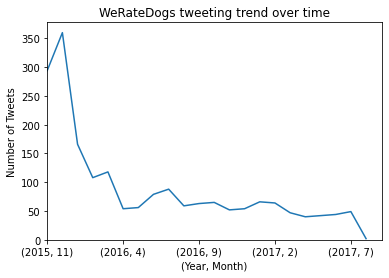

In [163]:
data = arc.tweet_id.groupby([arc["timestamp"].dt.year, arc["timestamp"].dt.month]).count()
xy = data.plot(kind='line', title='WeRateDogs tweeting trend over time')
xy.set_xlabel("(Year, Month)")
xy.set_ylabel("Number of Tweets")
xy.set_xlim(0, )
xy.set_ylim(0, )
plt.savefig('tweet_trend')

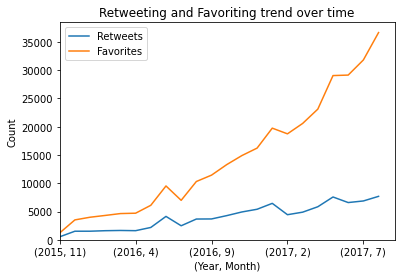

In [167]:
plt.subplots(1, sharex=True)
arc.retweet_count.groupby([arc["timestamp"].dt.year, arc["timestamp"].dt.month]).mean().plot(kind='line').set_xlim(0, )
arc.favorite_count.groupby([arc["timestamp"].dt.year, arc["timestamp"].dt.month]).mean().plot(kind='line').set_ylim(0, )
plt.title('Retweeting and Favoriting trend over time')
plt.ylabel('Count')
plt.xlabel('(Year, Month)')
plt.legend(('Retweets', 'Favorites'))
plt.savefig('ret_fav')

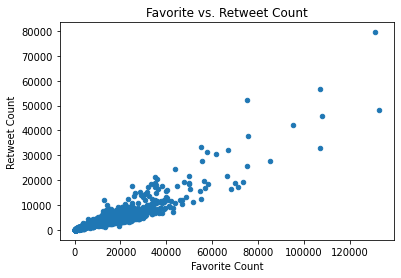

In [173]:
arc.plot.scatter(x='favorite_count', y='retweet_count')

plt.title('Favorite vs. Retweet Count')
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count');
plt.savefig('FavoritevsRetweet_Count')